# Campaign Analytics on banking dataset 

### - Praveen Reddy Guntaka

## Problem Statement

Task is to study the data, find data patterns and clean the data for further modeling to help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. Evaluate performance of the deployed model, state the evaluation metric used and suggest whether the bank ought to replace the current model (if applicable).

## Assumptions

**1.** No external factors are used to influence the response rate other than the variables in the dataset.


**2.** Predicting a person who is receptive of our campaign is more important than the one who is not.

### **In order to achive this we drive our work into 5 main segments:**

    
**1.** Importing required packages & Data

**2.** Data wrangling and Quality check

**3.** Exploratory Data Analysis

**4.** Evaluating existing model

**5.** Predictive Modeling

Conclusions & Future Scope 

##  <span style="color:green"> <center> 1. Importing required packages & Data </center> </span>

In [1]:
#Importing basic python packages
import pandas as pd
import numpy as np


import warnings #to ignore warnings
warnings.filterwarnings('ignore')

#Importing missing data imputation related packages
from sklearn.preprocessing import LabelEncoder #For one hot encoder
from sklearn.experimental import enable_iterative_imputer #for imputing missing data
from sklearn.impute import IterativeImputer # for imputing missing data


#Importing predictive modeling packages
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier #importing random forest algorithm
from sklearn.metrics import accuracy_score # for measuring accuracy
from sklearn.metrics import confusion_matrix # for building confusion matrix
from sklearn.metrics import roc_curve #roc
from sklearn.metrics import auc #auc
from sklearn import metrics
from sklearn.model_selection import train_test_split # test-train split
from sklearn.utils import resample #for resampling

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

#Importing required data visualization packages
import missingno as msno #for visualizing missing data
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization

In [2]:
data = pd.read_csv('DSA Data Set.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [4]:
data.shape

(41188, 22)

'DSA Data Set.csv' consist of data collected from european bank - 41,188 observations with 22 attributes

##  <span style="color:green"> <center> 2. Data wrangling and Quality check </center> </span>

Let us look into the data first and see where to start.

In [5]:
data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

Two observations made:

**1.** Missing values, it is evident by looking at **unknown** in the above dataframe that there are missing values in this dataset. Hence it has to be analysed.


**2.** Object data types, attributes such as 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week' are all categorical, but the problem is our algorithems cannot handle this when we try to impute mussing values. Hence we have to encode these to numeric.



In [7]:
data = data.replace('unknown', np.nan)

As a first step we convert 'unknown' string to null as above.

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


Now that we have replaced it, lets take a look at the dataset and remove duplicates(if any).

In [9]:
data.drop_duplicates(inplace=True) 

In [10]:
data.shape

(41176, 22)

Apparently there are 12 duplicate rows which were discarted. Now there are 41,176 observation with sasme 22 variables.

### <span style="color:brown"><center> 2.1 Missing data </center> </span>

Now that we have removed duplicates and replaced unknows to null values, lets look at the missing data. The 

missingData() function will return total number of rows in which any perticular attribute is missing and its percentage.

In [11]:
#Fuction to get missing data and its percentage.
def missingData(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = (dataframe.isnull().sum()*100/dataframe.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [12]:
missingData(data)

,Total,Percent
default,8596,20.876239
education,1730,4.201477
housing,990,2.404313
loan,990,2.404313
job,330,0.801438
marital,80,0.194288
y,0,0.000000
ModelPrediction,0,0.000000
contact,0,0.000000
month,0,0.000000


missingValuesHeatmap() to visualize missing data.

In [13]:
def missingValuesHeatmap(data):
    
    sns.heatmap(data.isnull(), cbar=False, cmap = 'Reds')

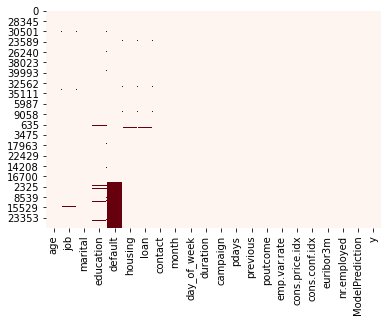

In [14]:
missingValuesHeatmap(data.sort_values('default')) 

### <span style="color:brown"><center> 2.3 Missing values Imputation </center> </span>

As discussed earlier, lets first build a function to encode categorical variables to numarical form.

In [15]:
def oneHotEncoder(columns, df):

    df[columns] = df[columns].apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    ))
    return df[columns]

In [16]:
#Alternatively instead of oneHotEncoder we can use this manual encoding either one results the same.

data['job']= data['job'].replace({'entrepreneur':10, 'management':8,'technician':4,'admin.':6,'services':5, 
                                  'self-employed':7,'blue-collar':9,'retired':11,'unemployed':1,'housemaid':2,
                                  'student':3})
data['education'] = data['education'].replace({'illiterate':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,
                                                  'high.school':5,'university.degree':6,'professional.course':7})
data['marital'] = data['marital'].replace({'single':1, 'married':2, 'divorced':3})
data['housing'] = data['housing'].replace({'yes':1, 'no':0})
data['default'] = data['default'].replace({'yes':1, 'no':0})
data['loan'] = data['loan'].replace({'yes':1, 'no':0})
data['y'] = data['y'].replace({'yes':1, 'no':0})

We now use iterative imputer with an initial strategy of **most frequent** and impute missing data, which will iteratively impute the missing obervations using similarity matrix.

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,2.0,2.0,2.0,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,5.0,2.0,5.0,NaN,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,5.0,2.0,5.0,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,6.0,2.0,3.0,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,5.0,2.0,5.0,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0


In [18]:
def imputingMissingData(columns, df):
    imp_cat = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

    df[columns] = imp_cat.fit_transform(df[columns])
    return df[columns]

In [19]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']
data[columns]=imputingMissingData(columns=columns, df=data)

Now if we call our missingData function again to check, we see all the missing values are being imputed.

In [20]:
missingData(data)

,Total,Percent
y,0,0.0
ModelPrediction,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


In [21]:
#Decoding the categorical variables for visualization
data['job']= data['job'].replace({10:'entrepreneur', 8:'management',4:'technician',6:'admin.',5:'services', 
                                  7:'self-employed',9:'blue-collar',11:'retired',1:'unemployed',2:'housemaid',
                                  3:'student'})
data['education'] = data['education'].replace({1:'illiterate',2:'basic.4y',3:'basic.6y',4:'basic.9y',
                                                  5:'high.school',6:'university.degree',7:'professional.course'})
data['marital'] = data['marital'].replace({1:'single', 2:'married', 3:'divorced'})
data['housing'] = data['housing'].replace({1:'yes', 0:'no'})
data['default'] = data['default'].replace({1:'yes', 0:'no'})
data['loan'] = data['loan'].replace({1:'yes', 0:'no'})

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41176 non-null  int64  
 1   job              41176 non-null  object 
 2   marital          41176 non-null  object 
 3   education        41176 non-null  object 
 4   default          41176 non-null  object 
 5   housing          41176 non-null  object 
 6   loan             41176 non-null  object 
 7   contact          41176 non-null  object 
 8   month            41176 non-null  object 
 9   day_of_week      41176 non-null  object 
 10  duration         41176 non-null  int64  
 11  campaign         41176 non-null  int64  
 12  pdays            41176 non-null  int64  
 13  previous         41176 non-null  int64  
 14  poutcome         41176 non-null  object 
 15  emp.var.rate     41176 non-null  float64
 16  cons.price.idx   41176 non-null  float64
 17  cons.conf.id

##  <span style="color:green"> <center> 3. Exploratory Data Analysis </center> </span>

Visualizing numeric features in boxplot gives us an understanding of there median and range, we can also look into the outliers.

In [24]:
def visulizingDataInBoxPlots(columns, df):

    i=1
    for column in columns:
        plt.figure(figsize = (15, 15))
        plt.style.use('seaborn-white')
        ax=plt.subplot(5,2,i)
        plt.boxplot(df[column])
        ax.set_title(column)
        i+1

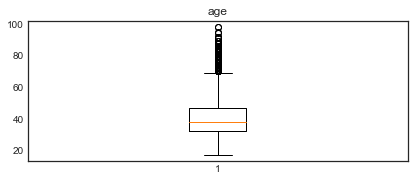

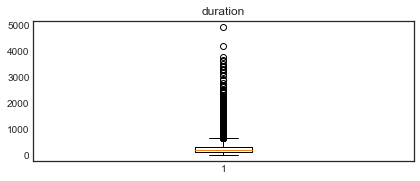

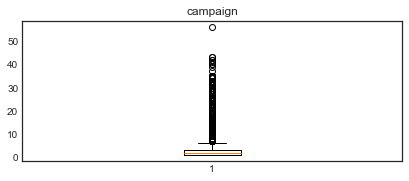

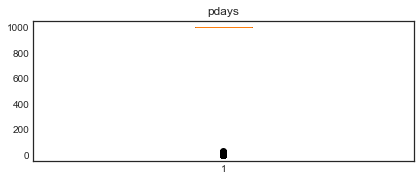

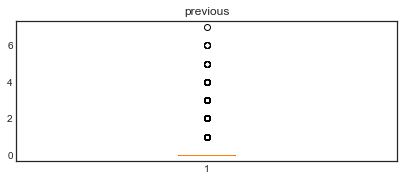

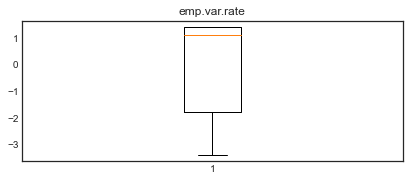

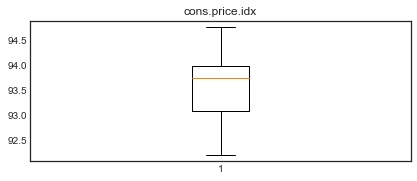

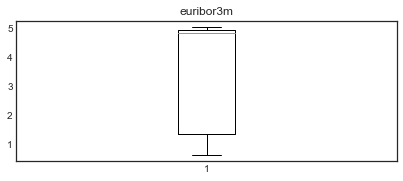

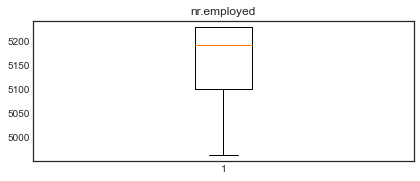

In [25]:
columns = ['age','duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
           'cons.price.idx', 'euribor3m', 'nr.employed' ]

visulizingDataInBoxPlots(columns=columns, df=data)


In [26]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

Data Manipulation on Age for better visualization, created 8 different buckets as age groups.

In [27]:
#Data Manipulation on Age for visualization, created 8 different buckets as age groups.
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = "20's"
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = "30's"
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = "40's"
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = "50's"
    column.loc[(column["age"] >= 60) & (column["age"] <= 69), 'age_group'] = "60's"
    column.loc[(column["age"] >= 70) & (column["age"] <= 79), 'age_group'] = "70's"
    column.loc[(column["age"] >= 80) & (column["age"] <= 89), 'age_group'] = "80's"
    column.loc[(column["age"] >= 90), 'age_group'] = "90+"

In [28]:
def visualizeData(masterColumn, targetColumn, df, kind='bar'):
    data = pd.crosstab(df[targetColumn],df[masterColumn])
    data = data.transpose()
    data.columns = data.columns.astype(str)
    data = data.rename(columns={"0":'Not Subscribed', "1":'Subscribed'})


    data['Contacted'] = data['Not Subscribed']+data['Subscribed']
    data = data.rename(columns={"0":'Not Subscribed', "1":'Subscribed',"total":'Contacted'})
    data.reset_index(drop=False)
    
    plot_age = data[['Subscribed','Contacted']].plot(kind = kind, figsize=(11,6))
    plt.xlabel(masterColumn)
    plt.ylabel('Subscriptions / Contacts')

    plt.xticks(np.arange(len(data.index)), data.index,rotation = 'horizontal')
    plt.title('Subscription vs. Contact')
    plt.show()

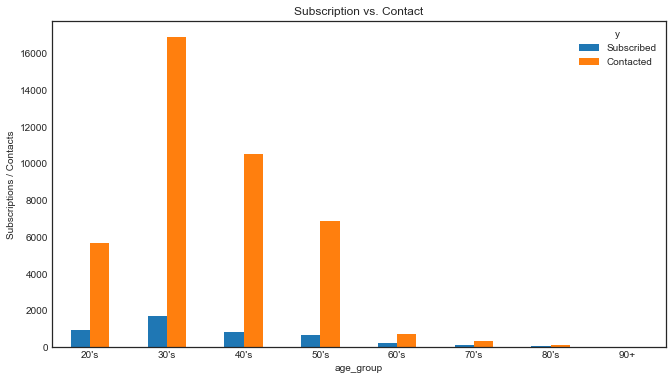

In [29]:
visualizeData(masterColumn='age_group', targetColumn='y', df=data)

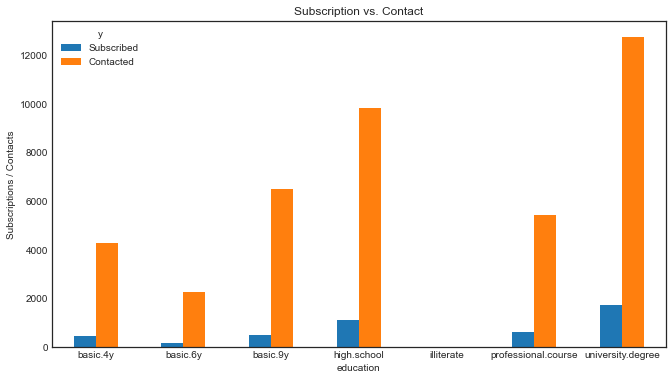

In [30]:
visualizeData(masterColumn='education', targetColumn='y', df=data)

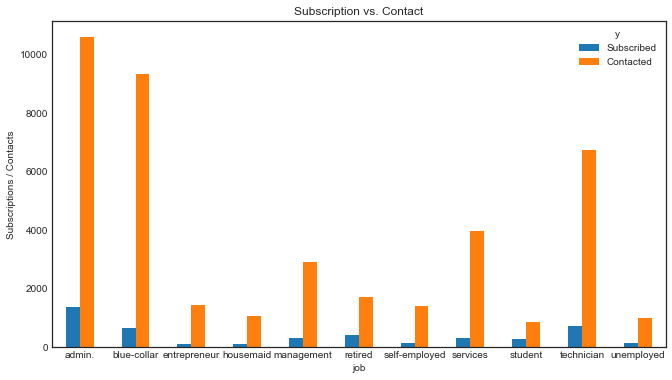

In [31]:
visualizeData(masterColumn='job', targetColumn='y', df=data)

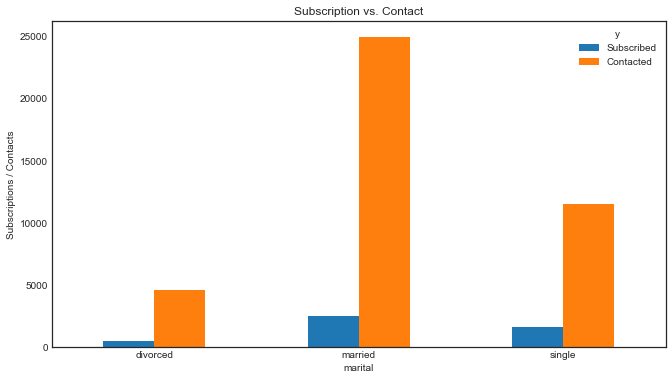

In [32]:
visualizeData(masterColumn='marital', targetColumn='y', df=data)

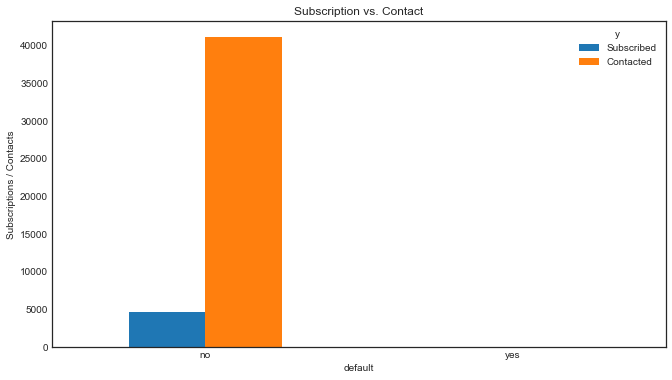

In [33]:
visualizeData(masterColumn='default', targetColumn='y', df=data)

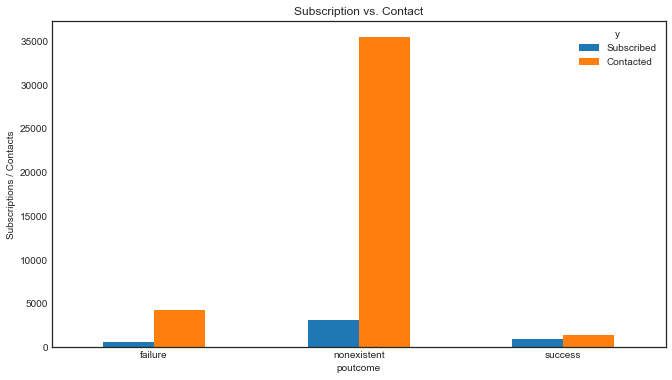

In [34]:
visualizeData(masterColumn='poutcome', targetColumn='y', df=data)

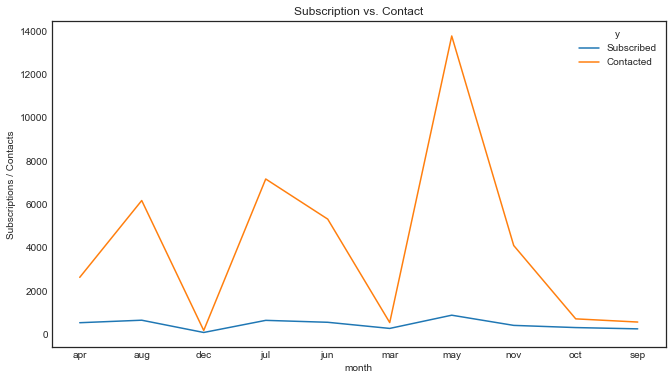

In [35]:
visualizeData(masterColumn='month', targetColumn='y', df=data, kind='line')

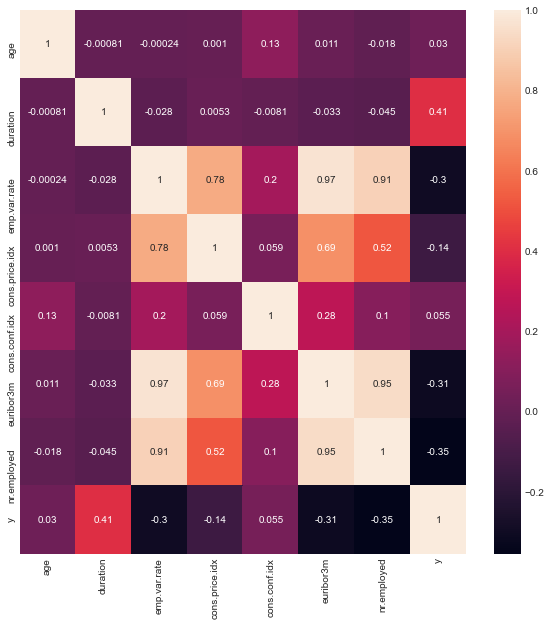

In [36]:
plt.subplots(figsize=(10,10))
sns.heatmap(data[['age', 'job', 'marital', 'education', 
                'loan', 'month', 'day_of_week', 'duration',
                'poutcome', 'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'euribor3m', 'nr.employed','y']].corr(), annot=True)
plt.show()

**Observations to note:**

Well there is no clear conclusion from the data, as the campaign contacts for some categories dominate others. In some cases it 1:5 ratio.


**1.** Our major concentration is on 20's to 50's age group and that makes complete sense, but the response rate of elderly people are slightly better.


**2.** Education has little to no effect on the response rate, the more we market (send campaign emails etc) the better the subsciption rate.


**3.** Moving on to the job titles, students and retired officers have slightly better response rate when compared to the admins and blue collars.


**4.** 'Default' plot has picture perfect story, we are not marketing to the ones who are default.


**5.** Marketing for the customers who previously subscribed would be a great start, they are most likely to subscribe to the lastest campaign.


##  <span style="color:green"> <center> 4. Evaluating existing model </center> </span>

When building and optimizing classification model, measuring how accurately it predicts our expected outcome is crucial. However, this metric alone is never the entire story, as it can still offer misleading results. Neverthless it can be a good starting point.

Lets create a function to get accuracy.

In [37]:
def caculateAccuracy(actualValues, predictedValues, threshold='auto'):
    # accuracy score
    accuracy = accuracy_score(predictedValues, actualValues)

    print('Accuracy score for threshold '+ str(threshold) +' is :', round(accuracy,2))
    return accuracy

Hence we are given with the information with probabilities on 'ModelPrediction' variable and we are not sure about the threshold for this probability to determine class, we take a range of thresholds to find accuracy for each value.

In [38]:
def settingThreshold( modelPredictedProbabilitiesColumn,df=data, threshold = .96):
    data['predicted'] = df[modelPredictedProbabilitiesColumn].gt(threshold).astype(int)
    return data['predicted']

In [39]:
accuracy = []
thr = []
for threshold in [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99, 0.999, 1]:
    actualValues = data.y
    predictedValues =settingThreshold( modelPredictedProbabilitiesColumn='ModelPrediction',df=data, threshold = threshold)


    accuracy.append(caculateAccuracy(actualValues, predictedValues, threshold))
    thr.append(threshold)

Accuracy score for threshold 0.9 is : 0.27
Accuracy score for threshold 0.91 is : 0.28
Accuracy score for threshold 0.92 is : 0.28
Accuracy score for threshold 0.93 is : 0.31
Accuracy score for threshold 0.94 is : 0.38
Accuracy score for threshold 0.95 is : 0.49
Accuracy score for threshold 0.96 is : 0.68
Accuracy score for threshold 0.97 is : 0.83
Accuracy score for threshold 0.98 is : 0.88
Accuracy score for threshold 0.99 is : 0.89
Accuracy score for threshold 0.999 is : 0.89
Accuracy score for threshold 1 is : 0.89


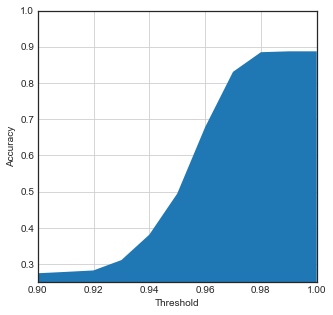

In [40]:
fig = plt.figure(figsize=[5,5])
ax = plt.subplot(111)
l = ax.fill_between(thr, accuracy)

# set the basic properties
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy')

# set the limits
ax.set_xlim(0.9, 1)
ax.set_ylim(0.25, 1)

# set the grid on
ax.grid('on')


If the threshold is 1, in other words if we classify all the observations as not subscribed then the accuracy for this model is 88.7%, this is due to imbalance in the data set with 88.7% of non subscribers. We need a model which can predict people who will subscribe to our campaign. Though accuracy is not enough to critic existing model it can surely give an idea of how the model performs.

Now lets look into confusion matrix and eliminate any confusion in intrepreting the accuracy score.

In [41]:
existingModelPrediction = settingThreshold(modelPredictedProbabilitiesColumn='ModelPrediction',
                                           df=data, threshold = .96)

In [42]:
def plotConfusionMatrix(confusionMatrix):    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax = ax, cmap='Greens'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not Subscibed', 'Subscibed']); ax.yaxis.set_ticklabels(['Not Subscibed', 'Subscibed']);

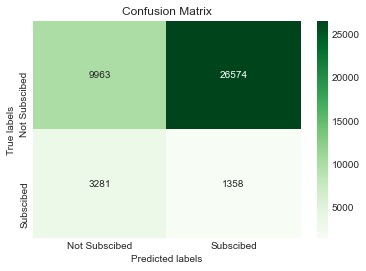

In [43]:
existingModelPrediction_0_9 = settingThreshold(modelPredictedProbabilitiesColumn='ModelPrediction',
                                               df=data, threshold = .9)

cm =confusion_matrix(data.y, existingModelPrediction_0_9)
plotConfusionMatrix(cm)

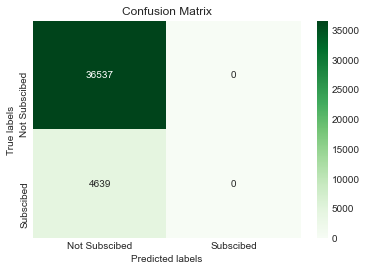

In [44]:
existingModelPrediction_1 = settingThreshold(modelPredictedProbabilitiesColumn='ModelPrediction',
                                             df=data, threshold = 1)
cm =confusion_matrix(data.y, existingModelPrediction)
plotConfusionMatrix(cm)

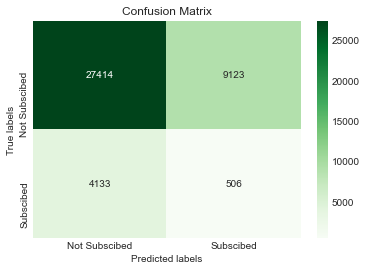

In [45]:
existingModelPrediction = settingThreshold(modelPredictedProbabilitiesColumn='ModelPrediction',
                                           df=data, threshold = .96)
cm =confusion_matrix(data.y, existingModelPrediction)
plotConfusionMatrix(cm)

In the above session we build confusion matrix with thresholds 0.9 and 1. We observe the classification trends of our existing model. In the following session we use ROC-AUC to get better understanding of the model.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [46]:
def plotROC(actualValues, predictedProbabilities):

    #Area Under the Curve calculation

    fpr, tpr, thresholds = metrics.roc_curve(actualValues, predictedProbabilities)
    auc = metrics.roc_auc_score(actualValues, predictedProbabilities)

    #Plotting
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Model', auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.fill_between(fpr, tpr)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate : ')
    plt.ylabel('True Positive Rate : ')
    plt.title('ROC')
    plt.legend(loc="lower right")
    ax.grid('on')
    plt.show() 

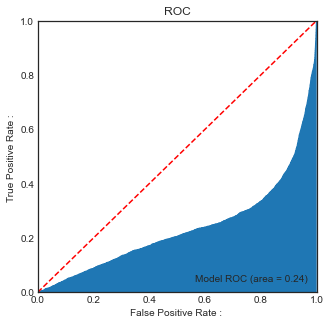

In [47]:
actualValues = data.y
predictedProbabilities = data.ModelPrediction
plt.figure(figsize = (5, 5))
plotROC(actualValues, predictedProbabilities)

The AOC is 0.24, which is not a good sign for a predictive model, even if we randomly assign a class without prediction it could do better. This means though this models tries to predict the outcome it fails in reaching its purpose. Hence I try to build a model in the following session which will anicipate to solve these inaccuracies.

Precision is a metric that quantifies the number of correct positive predictions made. It is calculated as the number of true positives divided by the total number of true positives and false positives.


Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. It is calculated as the number of true positives divided by the total number of true positives and false negatives (e.g. it is the true positive rate).


Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class).


As this is highly imbalanced data and predicting subscription responses will be beneficial for our campaign, precision-recall curve would be a great metric to evaluate the performance of a model. Let's look at precision-recall score.

In [48]:
average_precision = average_precision_score(existingModelPrediction, data.y)
print('Precision-Recall score is:', round(average_precision,2))

Precision-Recall score is: 0.23


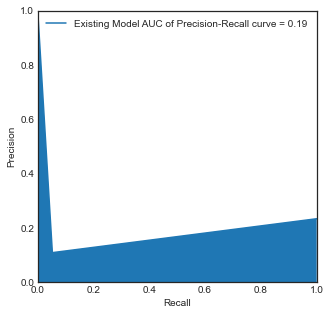

In [49]:
precision, recall, _ = precision_recall_curve(existingModelPrediction, data.y)

plt.figure(figsize = (5, 5))
auc_score = auc(recall, precision)
plt.plot(recall, precision, label='%s AUC of Precision-Recall curve = %0.2f' % ('Existing Model', auc_score))
plt.fill_between(recall, precision)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

##  <span style="color:green"> <center> 5. Predictive Modeling </center> </span>

### <span style="color:brown"><center> 5.1 Model with undersampling </center> </span>

As we can see that our data is heavely imbalanced. Imbalance means when observations in one class is higher than the observation in other classes then there exists a class imbalance. In our journey of predicting subsciption response from a person we can see in that people who subscribed are around 4000 which is roughly 11% when compared with 36000, who have not subscibed.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling). Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch).

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

**For this data I choose to go with undersampling technique.**

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. Undersampling can be a good choice when we have a large dataset. But a drawback to undersampling is that we are removing information that may be valuable.

Let's start this by splitting the data based on our response variable.

In [50]:
#Preparing data for model
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'month', 'day_of_week','y']
data[columns]=oneHotEncoder(columns=columns, df=data)

In [51]:
#Splitting the data based on class
df_majority = data[data.y==0]
df_minority = data[data.y==1]

In [52]:
df_minority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4639 entries, 75 to 41186
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4639 non-null   int64  
 1   job              4639 non-null   int64  
 2   marital          4639 non-null   int64  
 3   education        4639 non-null   int64  
 4   default          4639 non-null   int64  
 5   housing          4639 non-null   int64  
 6   loan             4639 non-null   int64  
 7   contact          4639 non-null   object 
 8   month            4639 non-null   int64  
 9   day_of_week      4639 non-null   int64  
 10  duration         4639 non-null   int64  
 11  campaign         4639 non-null   int64  
 12  pdays            4639 non-null   int64  
 13  previous         4639 non-null   int64  
 14  poutcome         4639 non-null   int64  
 15  emp.var.rate     4639 non-null   float64
 16  cons.price.idx   4639 non-null   float64
 17  cons.conf.id

In [53]:
#respmpling the data to balance our model
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

In [54]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [55]:
df_downsampled.y.value_counts()

1    4639
0    4639
Name: y, dtype: int64

Our  data has around 10,000 examples to build a model. Obviously we lost 3/4th of information, but this is a trade off to our goal in achiving a more accurate model.

In [56]:
def trainTestSplit(columnsToConsider, responseVariable, df, randomState=1, testSize=0.2):

    X_train, X_test, y_train, y_test = train_test_split(df[columnsToConsider], df[responseVariable], 
                                                            test_size=testSize, random_state=randomState, stratify=df[responseVariable])
    return X_train, X_test, y_train, y_test

In [92]:
X_test.shape

(1856, 14)

In [57]:
columnsToConsider = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'poutcome','month', 'day_of_week',
                     'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
X_train, X_test, y_train, y_test = train_test_split(df_downsampled[columnsToConsider], df_downsampled[['y']], 
                                                            test_size=0.20)

In [87]:
class_weight = dict({1:2})
rf_model = RandomForestClassifier(max_features=5, class_weight=class_weight, min_samples_split=10).fit(X_train, y_train)
rf_y_predict = rf_model.predict(X_test)
rf_score = accuracy_score(rf_y_predict, y_test)

In [88]:
print('Accuracy score is:', round(rf_score,2))

Accuracy score is: 0.72


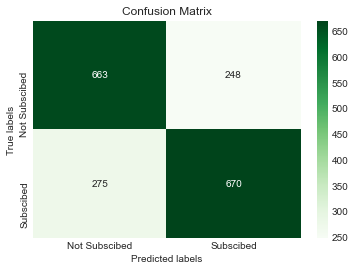

In [89]:
cm= confusion_matrix(y_test, rf_y_predict)
plotConfusionMatrix(cm)

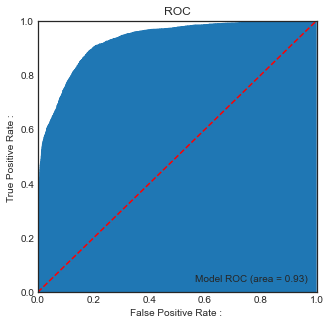

In [90]:
predictedProbabilities = rf_model.predict_proba(df_downsampled[columnsToConsider])[:,1]
actualValues = df_downsampled.y
plt.figure(figsize = (5, 5))
plotROC(actualValues, predictedProbabilities)

By correcting the imbalances in the data we are able to acheive 0.93 AUC, in other words we are now in a better place to classify observations when compared to existing model.

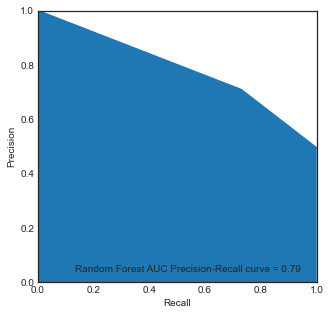

In [91]:
rf_precision, rf_recall, _ = precision_recall_curve(rf_y_predict, y_test)

auc_score = auc( rf_recall, rf_precision)
plt.figure(figsize = (5, 5))
plt.plot(rf_recall, rf_precision, label='%s AUC Precision-Recall curve = %0.2f' % ('Random Forest', auc_score))
plt.fill_between(rf_recall, rf_precision)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Precision recall score increased from 0.19 to 0.79.

In [93]:
def featureImportance(model, columnsToConsider):
    importance = model.feature_importances_
    plt.barh(columnsToConsider, importance)

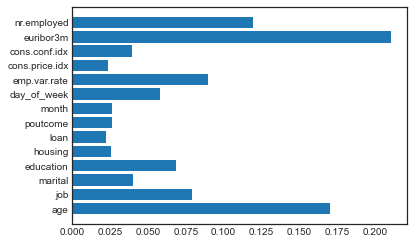

In [94]:
featureImportance(model=rf_model, columnsToConsider=columnsToConsider)

Top 3 features that helped our model to classify observations are euribor3m, nr.employed and age.

##  <span style="color:green"> <center>  Conclusions and Future Scope

**Conclusions:**

**1.** With Exploratory Data Analysis we see that the customers who had previously subscribed to our campaign will have better chance in upscaling for the latest campaign.


**2.** Performance of the existing model is no better than random classification.


**3.** With the correction of imbalances in the data, we are now able to predict better (with 72% accuracy, 0.79 Precision Recall score & 0.93 AUC). 



**Future Scope:** 


**1.** For the correction of imbalances oversampling techniques (like SMOTE)  can be explored to construct balanced data for prediction.


**2.** Advanced Machine Learning techniques like XGBoosting and SVM’s can be implemented to compare the predictability of a model.
